(60000, 28, 28) (10000, 28, 28)
(60000,)
(60000, 784) (10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0 

C:\Users\student\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.5177 - loss: 1.6953 - val_accuracy: 0.8522 - val_loss: 0.7290
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.8482 - loss: 0.6881 - val_accuracy: 0.8797 - val_loss: 0.5020
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.8729 - loss: 0.5151 - val_accuracy: 0.8928 - val_loss: 0.4196
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.8860 - loss: 0.4349 - val_accuracy: 0.9017 - val_loss: 0.3783
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.8943 - loss: 0.4018 - val_accuracy: 0.9064 - val_loss: 0.3539
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9018 - loss: 0.3671 - val_accuracy: 0.9078 - val_loss: 0.3372
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.9031 - loss: 0.3549 - val_accuracy: 0.9103 - val_loss: 0.3255
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.9051 - loss: 0.34

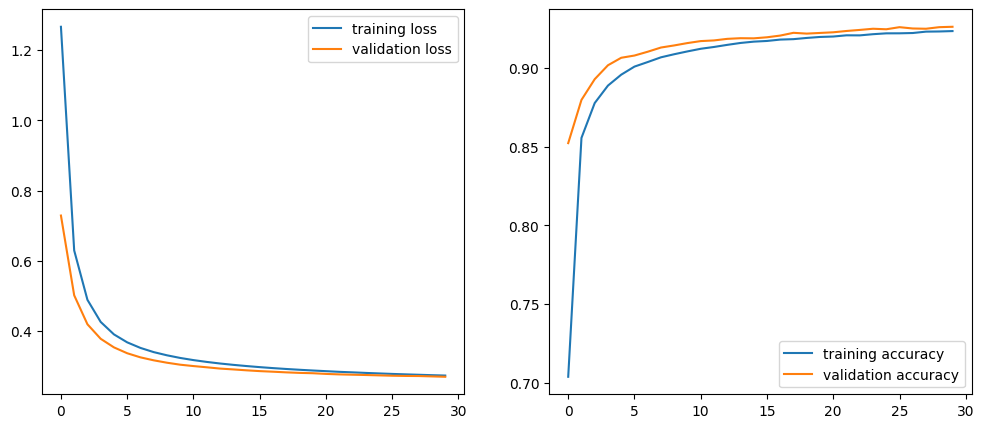

In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

#load the dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(X_train.shape,X_test.shape)
# plt.imshow(X_train[0])
# plt.show()
print(y_train.shape)

#flatten dimage
# plt.imshow(X_train[0])
X_train=X_train.reshape(X_train.shape[0],784)
X_test=X_test.reshape(X_test.shape[0],784)
print(X_train.shape,X_test.shape)
print(X_train[0])

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train.shape)

#normalization
print(X_train.max())
X_train=X_train/255
print(X_train.max())

print(X_test)
X_test=X_test/255
print(X_test)

model=Sequential()
model.add(Dense(10,input_dim=784,activation='softmax'))
#model.add(Dense(8))
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cp=ModelCheckpoint('my_mnist.keras',monitor='val_loss',save_best_only=True,mode='min') 
res=model.fit(X_train,y_train,
          epochs=30,
          batch_size=32,
          validation_split=0.2,
          callbacks=[cp])
model.evaluate(X_test,y_test)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(res.history['loss'],label='training loss')
plt.plot(res.history['val_loss'],label='validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(res.history['accuracy'],label='training accuracy')
plt.plot(res.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()